### Write a decision tree to monitor the demand for bicycles.

In [1]:
#necessary libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from collections import Counter
#from treelib import Node, Tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#load the dataset
df = pd.read_csv("coursework2.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,01/01/2011,1,0,1,0,6,0,2,14.11,18.18,0.81,0.16,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,14.90,17.69,0.70,0.25,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,8.05,9.47,0.44,0.25,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,8.20,10.61,0.59,0.16,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,9.31,11.46,0.44,0.19,82,1518,1600


***Continuous variables*** – ‘dteday‘, ‘temp', 'atemp’, ‘hum’, ‘windspeed’, ‘casual’, ‘registered’, ‘count’. <br>
***Categorical Variables*** - 'season', 'yr', 'mnth', 'holiday', ‘weekday’, ‘workingday’, ‘weathersit‘.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  count       731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


From the above command, we notice that every column has 731 rows. This seems to be a very clean set of data and there are **no missing data** in any of the columns. 

### Plot a histogram of the counts and use this information to divide the counts into three categories ‘high’, ‘medium’ and ‘low’. Create a new feature in the dataset called ‘usage’ which contains values ‘high’, ‘medium’, and ‘low’ depending on the value in ‘count’.

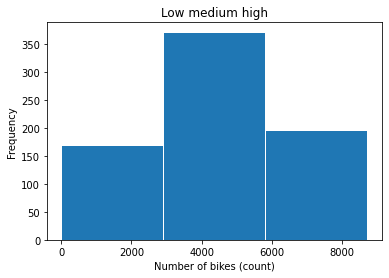

In [4]:
#histogram of count column
histogram_count = plt.hist(df["count"], bins = 3, rwidth=0.99)
plt.title('Low medium high')
plt.xlabel('Number of bikes (count)')
plt.ylabel('Frequency')
plt.show()

In [5]:
#assign low, medium and high for count
low_med_high_values = np.round(histogram_count[1])
low_med_high_condition = [df['count'].between(1,low_med_high_values[1],inclusive=True),
      df['count'].between(low_med_high_values[1]+1,low_med_high_values[2],inclusive=True),]

values = ["low", "medium"]

df['usage'] = np.select(low_med_high_condition,values,"high")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count,usage
0,1,01/01/2011,1,0,1,0,6,0,2,14.11,18.18,0.81,0.16,331,654,985,low
1,2,02/01/2011,1,0,1,0,0,0,2,14.90,17.69,0.70,0.25,131,670,801,low
2,3,03/01/2011,1,0,1,0,1,1,1,8.05,9.47,0.44,0.25,120,1229,1349,low
3,4,04/01/2011,1,0,1,0,2,1,1,8.20,10.61,0.59,0.16,108,1454,1562,low
4,5,05/01/2011,1,0,1,0,3,1,1,9.31,11.46,0.44,0.19,82,1518,1600,low


In [6]:
#new dataframe df1 with three attributes and target
df1 = df[["season", "workingday", "weathersit", "usage"]]
df1.head()

,season,workingday,weathersit,usage
0,1,0,2,low
1,1,0,2,low
2,1,1,1,low
3,1,1,1,low
4,1,1,1,low


### Write a function to calculate the entropy of a subset of the target values.

In [7]:
def entropy(target):
    
    """calculate the entropy of a given attribute"""
    value_count = Counter(target)
    length_target = len(target)
    entropy = 0

    for label in value_count:
        result = -1*(value_count[label]/length_target)*np.log2(value_count[label]/length_target)
        entropy+=result

    return entropy


print("Entropy of the target: ", entropy(df1["usage"]))

Entropy of the target:  1.4917401149421707


### Write a function to calculate the information gain of an attribute.  Which attribute has the highest information gain over the whole dataset.

In [8]:
def informationgain(df, attribute, target):
    
    """calculate the information gain"""
    target_entropy = entropy(df[target])
    value_count = Counter(df[attribute])
    attribute_entropy = 0
    
    for label in value_count:
        sub_df = df.loc[df[attribute] == label]
        label_entropy = (len(sub_df)/len(df))*entropy(sub_df[target])
        attribute_entropy+=label_entropy

    return target_entropy - attribute_entropy

#calculating information gain of each attribute.
attributes = df1.columns[:-1]
Information_gain = dict([(attribute, informationgain(df1, attribute, "usage")) for attribute in attributes])

print("Information Gain for all the attributes: ", Information_gain)
print()
print("Attribute with the highest Information Gain: ", max(Information_gain, key = Information_gain.get))

Information Gain for all the attributes:  {'season': 0.2524862810381532, 'workingday': 0.0044543496239708436, 'weathersit': 0.07062140440375142}

Attribute with the highest Information Gain:  season


### Write a function to build a decision tree.

In [9]:
def train_test_split(df, test_size):
    
    """Action: splitting the dataset into training and testing sets"""
    """Output: return X_train, X_test, y_train, y_test"""
    
    if type(test_size) == float:
        length_df = len(df)
        test_size = round(test_size*length_df)
        test_df = df.sample(n = test_size)
        train_df = df.drop(test_df.index.tolist())
        return train_df, test_df
        
    else:
        print("Invalid test size")
        
        
def decisiontree(df,dataframe,attributes,label = df.columns[-1],parent = None):
    
    """Decision tree"""
    
    if len(set(df[label])) <= 1:
        return list(df[label])[0]
    elif len(df) == 0:
        return max(Counter(dataframe[label]), key=Counter(dataframe[label]).get)
    elif len(attributes) ==0:
        return parent
    else:
        parent = max(Counter(df[label]), key=Counter(df[label]).get)
        item_values = [informationgain(df, attribute, label) for attribute in attributes]
        best_index = item_values.index(max(item_values))
        best_feature = attributes[best_index]
        
        tree = {best_feature:{}}
        attributes = [attribute for attribute in attributes if attribute != best_feature]
        
        for value in sorted(list(set(df[best_feature]))):
            temp_df = df.where(df[best_feature] == value).dropna()
            subtree = decisiontree(temp_df,df,attributes,label,parent)
            tree[best_feature][value] = subtree
            
        return(tree)
        
        

In [10]:
tree = decisiontree(df1,df1,df1.columns[:-1],parent = None)

In [11]:
pprint(tree)

{'season': {1: {'workingday': {0.0: {'weathersit': {1.0: 'low',
                                                    2.0: 'low',
                                                    3.0: 'low'}},
                               1.0: {'weathersit': {1.0: 'low',
                                                    2.0: 'low',
                                                    3.0: 'low'}}}},
            2: {'weathersit': {1.0: {'workingday': {0.0: 'medium',
                                                    1.0: 'medium'}},
                               2.0: {'workingday': {0.0: 'medium',
                                                    1.0: 'medium'}},
                               3.0: 'low'}},
            3: {'weathersit': {1.0: {'workingday': {0.0: 'medium',
                                                    1.0: 'medium'}},
                               2.0: {'workingday': {0.0: 'medium',
                                                    1.0: 'medium'}},
                     

Reference: https://stackoverflow.com/questions/39651638/displaying-a-dictionary-in-a-tree-structure-in-python. I was inspired by this link for visualising the tree.

In [12]:
def buildtree(dictionary, last_key, current):
    for key, value in dictionary.items():
        if type(key) == int or type(key) == float:
            for num in range(current - 1):
                print("|", end = "")
                
            print(last_key, "= ", end="")
            print(key, ":", end="")
        else:
            if current > 0:
                print("")
                
            current+=1
            
        if type(value) is dict:
            buildtree(value, key, current)
        else:
            print(value)

### Create a new attribute called ‘tempbins’ by binning the ‘temp’ attribute into ‘low’ if ‘temp’ < 12, ‘medium’ if 12 ≤ ‘temp’ < 24, and ‘high’ if ‘temp’ ≥ 24. Does this attribute alter the structure of the decision tree?

In [14]:
def temp_condition(row):
    if row["temp"] < 12:
        val = "low"
    elif row["temp"] >= 12 and row["temp"] < 24:
        val = "medium"
    else:
        val = "high"
        
    return val

df['tempbins'] = df.apply(temp_condition, axis = 1)
df1['tempbins'] = df['tempbins']
df1 = df1[["season", "workingday", "weathersit", "tempbins", "usage"]]


In [15]:
tree = decisiontree(df1,df1,df1.columns[:-1],parent = None)

In [22]:
pprint(tree)

{'tempbins': {'high': {'weathersit': {1.0: {'season': {2.0: {'workingday': {0.0: 'high',
                                                                            1.0: 'high'}},
                                                       3.0: {'workingday': {0.0: 'medium',
                                                                            1.0: 'medium'}},
                                                       4.0: {'workingday': {1.0: 'high'}}}},
                                      2.0: {'season': {2.0: {'workingday': {0.0: 'medium',
                                                                            1.0: 'medium'}},
                                                       3.0: {'workingday': {0.0: 'medium',
                                                                            1.0: 'medium'}},
                                                       4.0: {'workingday': {0.0: 'medium',
                                                                            1.0: 'me

As we can see from the above cell, the structure of the decision tree is different from the previous one. Now, 'tempbins' is the root node. This is because the ‘tempbins’ attribute has the maximum information gain and so the ‘tempbins’ as the root node and the data is split based on the same feature.